<a href="https://colab.research.google.com/github/iguigu8191/first-git/blob/main/todai_medicalAI2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! wget https://www.dropbox.com/s/x0nhtd5v4ino22q/nih_xp_resized.tar.gz

--2021-04-22 14:25:10--  https://www.dropbox.com/s/x0nhtd5v4ino22q/nih_xp_resized.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/x0nhtd5v4ino22q/nih_xp_resized.tar.gz [following]
--2021-04-22 14:25:10--  https://www.dropbox.com/s/raw/x0nhtd5v4ino22q/nih_xp_resized.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0066abfc38d58d1aac8d13acfa.dl.dropboxusercontent.com/cd/0/inline/BNGBsm5eMO376m3pTw0lZBPNLTo2LkjuZD-HWtnwUCJs4cG5xJnSdyt5mUonyWjt87cCcnQ7ChENjYW6D-zy9f6FqjMB-EBBTIlDNM1aLbmR3On6AJQUqKBtoMTT-uPs0wheGOCeKxP8NdQ8BZiMzWo7/file# [following]
--2021-04-22 14:25:11--  https://uc0066abfc38d58d1aac8d13acfa.dl.dropboxusercontent.com/cd/0/inline/BNGBsm5eMO376m3pTw0lZBPNLTo2LkjuZD-HWtnwUCJs4cG5xJnSdyt5mUonyWj

In [3]:
! tar -zxf ./nih_xp_resized.tar.gz

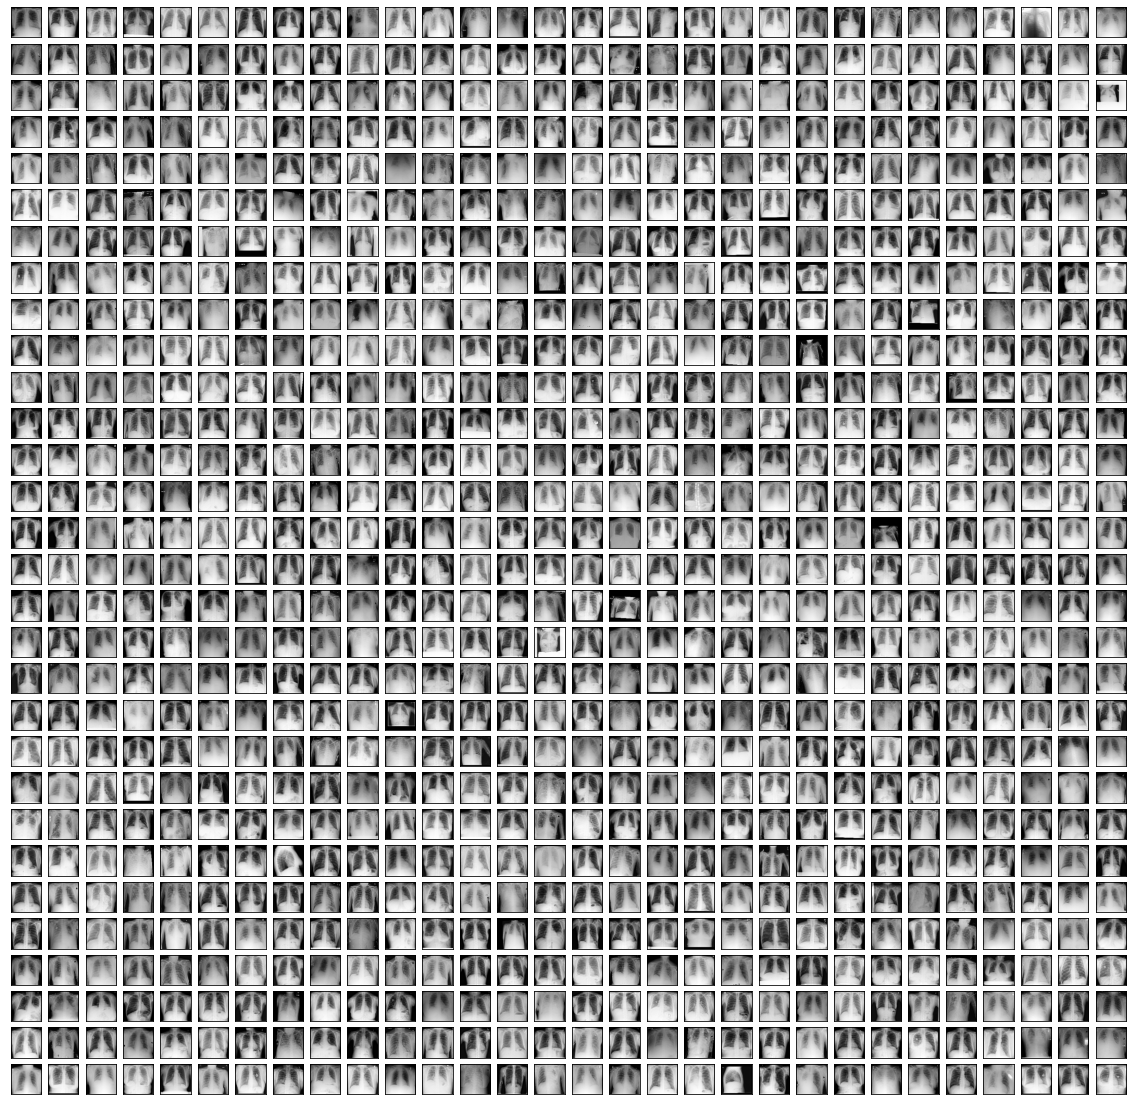

In [4]:
import matplotlib.pyplot as plt
import cv2

def show_images_as_matrix(paths, off_set, num_row, num_column):

    plt.figure(figsize=(20, 20))

    for i in range(0, num_row*num_column):
        plt.subplot(num_row, num_column, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        img = cv2.imread(paths[off_set + i], 0)
        plt.imshow(img, cmap="gray")

    plt.show()

import glob
paths_regex = glob.glob("/content/nih_xp_resized/images_96/*.png")
show_images_as_matrix(paths_regex, 0, 30, 30)

In [5]:
import pandas as pd
import numpy as np

df_train_val = pd.read_csv("/content/nih_xp_resized/img_labels_train_val.csv")
df_test = pd.read_csv("/content/nih_xp_resized/img_labels_test.csv")

In [6]:
print(df_train_val)

            Image Index Finding Labels  ...     y]  label
0      00000001_000.png   Cardiomegaly  ...  0.143      1
1      00000002_000.png     No Finding  ...  0.171      0
2      00000003_001.png         Hernia  ...  0.168      1
3      00000004_000.png    Mass|Nodule  ...  0.168      1
4      00000005_000.png     No Finding  ...  0.168      0
...                 ...            ...  ...    ...    ...
24995  00024996_000.png     No Finding  ...  0.143      0
24996  00024997_000.png   Infiltration  ...  0.139      1
24997  00024998_000.png   Infiltration  ...  0.139      1
24998  00024999_000.png     No Finding  ...  0.139      0
24999  00025000_000.png     No Finding  ...  0.139      0

[25000 rows x 12 columns]


In [7]:
df_train_val.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],label
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143,1
1,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171,0
2,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168,1
3,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168,1
4,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,0.168,0.168,0


(array([ 129.,  235.,  735.,  844.,  829., 1070., 1107.,  647.,  179.,
          30.]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <a list of 10 Patch objects>)

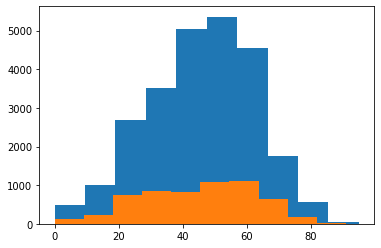

In [8]:
plt.hist(df_train_val['Patient Age'], bins=10)
plt.hist(df_test['Patient Age'], bins=10)

(array([3132.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2673.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

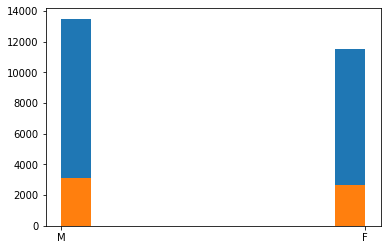

In [9]:
plt.hist(df_train_val['Patient Gender'])
plt.hist(df_test['Patient Gender'])

In [10]:
# 学習用・テスト用の画像データセット作成

import os 
import numpy as np
import torch

def read_imgs(file_names, img_dir='/content/nih_xp_resized/images_96', width=96, height=96):
    result = []
    for file_name in file_names:
        img = cv2.imread(os.path.join(img_dir, file_name), 0)
        img_array = np.array(img).reshape(1, 1, width, height)
        result.append(img_array)
    return result

img_train_val = read_imgs(df_train_val['Image Index'])
img_train_val = torch.tensor(np.concatenate(img_train_val, axis=0))

img_test = read_imgs(df_test['Image Index'])
img_test = torch.tensor(np.concatenate(img_test, axis=0))

print("Size of train_val: ", img_train_val.shape)
print("Size of test: ", img_test.shape)

Size of train_val:  torch.Size([25000, 1, 96, 96])
Size of test:  torch.Size([5805, 1, 96, 96])


In [11]:
print(img_test[0])

tensor([[[  0,   0, 116,  ...,  31,  30,  32],
         [  0,   0, 112,  ...,  30,  30,  31],
         [  0,   0, 113,  ...,  28,  30,  31],
         ...,
         [  0,   0,  68,  ...,  25,  24,  24],
         [  0,   0,  89,  ...,  33,  32,  33],
         [  0,   0,   0,  ...,   0,   0,   0]]], dtype=torch.uint8)


In [12]:
# 学習用・テスト用の正解データセット作成
# 2値分類で行う。
# Finding Labelsが"No Finding"であれば 0 、それ以外は1となるように正解データを作成する

label_train_val = []
for label in df_train_val['Finding Labels']:
    if label == "No Finding":
        label_train_val.append(0)
    else:
        label_train_val.append(1)

label_test = []
for label in df_test['Finding Labels']:
    if label == "No Finding":
        label_test.append(0)
    else:
        label_test.append(1)

label_train_val = torch.tensor(label_train_val)
label_test = torch.tensor(label_test)

print(label_train_val.size())
print(label_test.size())

torch.Size([25000])
torch.Size([5805])


In [13]:
print(label_train_val)

tensor([1, 0, 1,  ..., 1, 0, 0])


In [14]:
class MyDataset(torch.utils.data.Dataset):

    def __init__(self, data, label, transform=None):
        self.transform = transform
        self.data = data
        self.data_num = len(data)
        self.label = label

    def __len__(self):
        return self.data_num

    def __getitem__(self, idx):
        if self.transform:
            out_data = self.transform(self.data)[0][idx]
            out_label = self.label[idx]
        else:
            out_data = self.data[idx]
            out_label = self.label[idx]

        return out_data, out_label

In [15]:
def load_NIHXP(batch=128):
    transform = transforms.Compose([transforms.ToTensor(), 
                                    transforms.Normalize((0.1307,), (0.3081,))])

    train_set = MyDataset(img_train_val, label_train_val)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch,
                                               shuffle=True, num_workers=2)

    val_set = MyDataset(img_test, label_test)

    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch,
                                             shuffle=True, num_workers=2)

    return {"train":train_loader, "validation":val_loader}

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [17]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(46*46*64, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = f.relu(x)
        x = self.conv2(x)
        x = f.relu(x)
        x = self.pool(x)
        x = self.dropout1(x)
        x = x.view(-1, 46*46*64)
        x = self.fc1(x)
        x = f.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)

        return f.log_softmax(x, dim=1)

In [18]:
epoch = 20
batch_size = 64
history = {
    "train_loss": [],
    "validation_loss": [],
    "validation_acc": []
}

data_loader = load_NIHXP(batch=batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

net = MyNet().to(device)
print(net)

optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

cuda
MyNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=135424, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


In [21]:
for e in range(epoch):
    loss = None
    train_loss = 0.0
    net.train()
    print("\nTrain start")
    for i, (data, target) in enumerate(data_loader["train"]):
        data, target = data.to(device), target.to(device)
        data= data.float()

        optimizer.zero_grad()
        output= net(data)
        loss = f.nll_loss(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

        if i % 100 == 99:
            print("Training: {} epoch. {} iteration. Loss:{}".format(e+1, i+1, loss.item()))

    train_loss /= len(data_loader["train"])
    print("Training loss (ave.): {}".format(train_loss))
    history["train_loss"].append(train_loss)

    print("\nValidation start")
    net.eval()
    val_loss = 0.0
    accuracy = 0.0

    with torch.no_grad():
        for data, target in data_loader["validation"]:
            data, target = data.to(device), target.to(device)
            data = data.float()

            output = net(data)
            loss = f.nll_loss(output, target).item()
            val_loss += f.nll_loss(output, target, reduction='sum').item()
            predict = output.argmax(dim=1, keepdim=True)
            accuracy += predict.eq(target.view_as(predict)).sum().item()

    val_loss /= len(data_loader["validation"].dataset)
    accuracy /= len(data_loader["validation"].dataset)

    print("Validation loss: {}, Accuracy: {}\n".format(val_loss, accuracy))
    history["validation_loss"].append(val_loss)
    history["validation_acc"].append(accuracy)


Train start
Training: 1 epoch. 100 iteration. Loss:0.6858974695205688
Training: 1 epoch. 200 iteration. Loss:0.6205779314041138
Training: 1 epoch. 300 iteration. Loss:0.6419395208358765
Training loss (ave.): 0.6056648006524576

Validation start
Validation loss: 0.6475172639201162, Accuracy: 0.6540913006029285


Train start
Training: 2 epoch. 100 iteration. Loss:0.6080209612846375
Training: 2 epoch. 200 iteration. Loss:0.5532652735710144
Training: 2 epoch. 300 iteration. Loss:0.55525141954422
Training loss (ave.): 0.5961183908650333

Validation start
Validation loss: 0.6497627994297498, Accuracy: 0.6540913006029285


Train start
Training: 3 epoch. 100 iteration. Loss:0.5230448246002197
Training: 3 epoch. 200 iteration. Loss:0.5683003067970276
Training: 3 epoch. 300 iteration. Loss:0.5861603617668152
Training loss (ave.): 0.5863801833918637

Validation start
Validation loss: 0.6599060301735522, Accuracy: 0.6527131782945736


Train start
Training: 4 epoch. 100 iteration. Loss:0.592715322

ValueError: ignored

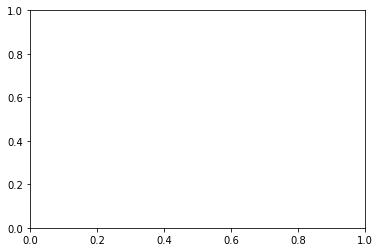

In [22]:
plt.figure()
plt.plot(range(1, epoch+1), history["train_loss"], label="train_loss")
plt.plot(range(1, epoch+1), history["validation_loss"], label="validation_loss")
plt.xlabel("epoch")
plt.legend()
plt.savefig("loss.png")

plt.figure()
plt.plot(range(1, epoch+1), history["validation_acc"])
plt.title("test accuracy")
plt.xlabel("epoch")
plt.savefig("test_acc.png")